# Convolutional Neural Network Exercise

### Importing the libraries

In [115]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras import callbacks

In [116]:
tf.__version__

'2.9.2'

## Part 1 - Data Preprocessing

### Download the dataset

In [117]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

Selected idexes for two classes (aircraft = 0, ship = 8)

In [118]:
index_train = np.where((y_train == 0) | (y_train == 8))
index_test = np.where((y_test == 0) | (y_test == 8))

We will extract the two desired classes by their indexes

In [119]:
x_train = x_train[index_train[0],:]
y_train = y_train[index_train[0]]
x_test = x_test[index_test[0],:]
y_test = y_test[index_test[0]]

Change all labels from 8 to 1 (aircraft = 0, ship = 1)

In [120]:
y_train[y_train == 8] = 1
y_test[y_test == 8] = 1

The current shape of the data set:

In [121]:
print(f'x_train: {x_train.shape}\ny_train: {y_train.shape}\nx_test: {x_test.shape}\ny_testn: {y_test.shape}')

x_train: (10000, 32, 32, 3)
y_train: (10000, 1)
x_test: (2000, 32, 32, 3)
y_testn: (2000, 1)


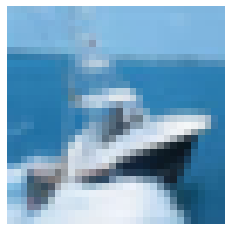

1

In [122]:
import matplotlib
plt.imshow(x_train[0], cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
y_train[0][0]

### Preprocessing the Training set

In [123]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow(x=x_train, y=y_train, batch_size = 32)

### Preprocessing the Test set

In [124]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow(x=x_test, y=y_test, batch_size = 32)

## Part 2 - Building the CNN

### Initialising the CNN

In [125]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [126]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))

### Step 2 - Pooling

In [127]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [128]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [129]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Fully Connected layers + Dropout

In [130]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.1))
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.1))

### Step 5 - Output Layer

In [131]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [132]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1152)              0         
                                                                 
 dense_17 (Dense)            (None, 128)              

## Part 3 - Training the CNN

### Compiling the CNN

In [133]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Callback function initialization

In [134]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=3)

### Training the CNN on the Training set and evaluating it on the Test set

In [135]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 100, callbacks=[callback])

Epoch 1/100
313/313 [==============================] - 7s 19ms/step - loss: 0.6041 - accuracy: 0.6686 - val_loss: 0.5138 - val_accuracy: 0.7640
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.4724 - accuracy: 0.7843 - val_loss: 0.4747 - val_accuracy: 0.7765
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.4026 - accuracy: 0.8212 - val_loss: 0.3672 - val_accuracy: 0.8445
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.3558 - accuracy: 0.8479 - val_loss: 0.3648 - val_accuracy: 0.8440
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.3217 - accuracy: 0.8648 - val_loss: 0.2836 - val_accuracy: 0.8845
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.2947 - accuracy: 0.8774 - val_loss: 0.2829 - val_accuracy: 0.8830
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.2886 - accuracy: 0.8796 - val_loss: 0.2620 - val_accuracy:

## Part 4 - Making a single prediction

## Visualization Loss and Accuracy


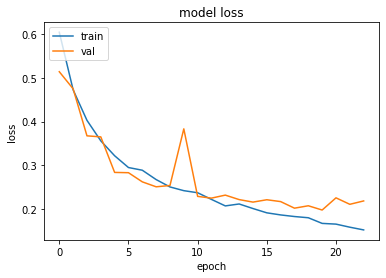

In [136]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

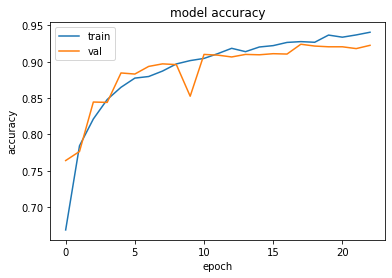

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Test and Metrics

In [138]:
y_pred = cnn.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[915  85]
 [172 828]]


0.8715